A company started to invest in digital marketing as a new way of their product
promotions. For that they collected data and decided to carry out a study on it.
● The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.
● The company needs to check whether there is any dependency between
thefeatures “Region” and “Manager”.
Help the company to carry out their study with the help of data provided.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, chi2_contingency

df = pd.read_csv(r"C:\Users\csaru\Downloads\Sales_add.csv")

print(df.head())
print(df.info())
print(df.describe())


sales_before = df['Sales_before_digital_add(in $)']
sales_after = df['Sales_After_digital_add(in $)']
mean_sales_before = sales_before.mean()
mean_sales_after = sales_after.mean()
print("Mean sales before digital marketing:", mean_sales_before)
print("Mean sales after digital marketing:", mean_sales_after)


t_stat, p_value = ttest_rel(sales_before, sales_after)
if p_value < 0.05:
    print("There is a significant increase in sales after digital marketing.")
else:
    print("There is no significant increase in sales after digital marketing.")



     Month      Region      Manager  Sales_before_digital_add(in $)  \
0  Month-1  Region - A  Manager - A                          132921   
1  Month-2  Region - A  Manager - C                          149559   
2  Month-3  Region - B  Manager - A                          146278   
3  Month-4  Region - B  Manager - B                          152167   
4  Month-5  Region - C  Manager - B                          159525   

   Sales_After_digital_add(in $)  
0                         270390  
1                         223334  
2                         244243  
3                         231808  
4                         258402  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager         

There is no dependency between 'Region' and 'Manager'.


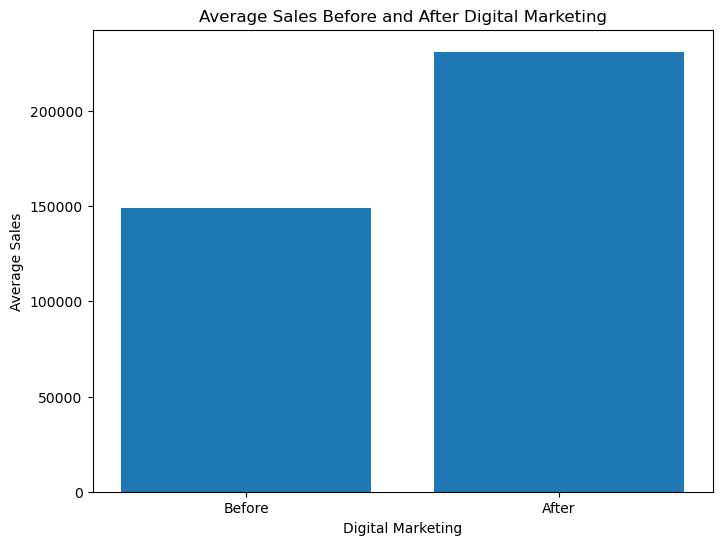

In [3]:
cross_table = pd.crosstab(df['Region'], df['Manager'])
chi2, p, _, _ = chi2_contingency(cross_table)
if p < 0.05:
    print("There is a dependency between 'Region' and 'Manager'.")
else:
    print("There is no dependency between 'Region' and 'Manager'.")

plt.figure(figsize=(8, 6))
plt.bar(['Before', 'After'], [mean_sales_before, mean_sales_after])
plt.xlabel('Digital Marketing')
plt.ylabel('Average Sales')
plt.title('Average Sales Before and After Digital Marketing')
plt.show()